<h3> Basic Statistics </h3>
References
https://docs.python.org/3/library/statistics.html#statistics.stdev

https://docs.scipy.org/doc/numpy-1.13.0/index.html

http://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm


In [1]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

### Basic Conditional Probability

Conditional probability

$$P(E|F) = \frac{P(E \cap F)}{P(F)} = \frac{P(E,F)}{P(F)}$$ 

$$P(E,F) = P(E|F) P(F) $$

#### Simple Example for conditional probability:

Suppose you draw two cards from a deck and you win if you get a jack in the first draw and an ace in the second draw (without replacement). What is the probability of winning, given that you got a jack in the first draw?

Let event F be getting a jack in the first draw

Let event E be getting an ace in the second draw.

We need to find probability of winning, given that you got a jack in the first draw, which is P(E|F)

P(F) = 4/52

P(E) = 4/51 {no replacement}

P(F and E) = P(F,E) = 4/52*4/51= 0.006

$$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{0.006}{0.077}$$ 



### Baye's Theorem

In general for two events E and F, we can define conditional probability two ways (it is not true for the example constructed  above):
 
$$P(E|F) = \frac{P(E \cap F)}{P(F)} = \frac{P(E,F)}{P(F)}$$ 

$$P(F|E) = \frac{P(F \cap E)}{P(E)} = \frac{P(F,E)}{P(E)}$$ 




$$P(E,F) = P(F|E) P(E) $$

The two expressions for joint probability lead to Baye's Theorem

$$P(E \cap F) = P(F \cap E) $$

$$P(E|F) P(F) = P(F|E) P(E) $$






#### Simple Example for Baye's Theorem

Let’s say we’re testing for a rare disease, where 1% of the population is infected. We have a highly sensitive and specific test, which is not quite perfect:

- 99% of sick patients test positive.
- 99% of healthy patients test negative.

Given that a patient tests positive, what is the probability that the patient is actually sick?

A naive approach to answering this question is this: Imagine we have 10,000 perfectly representative people. That would mean that 100 are sick, and 9,900 are healthy. Moreover, after giving all of them the test we’d get 99 sick people testing sick, but 99 healthy people testing sick as well. If you test positive, in other words, you’re equally likely to be healthy or sick; the answer is 50%. A tree diagram of this approach is shown in Figure

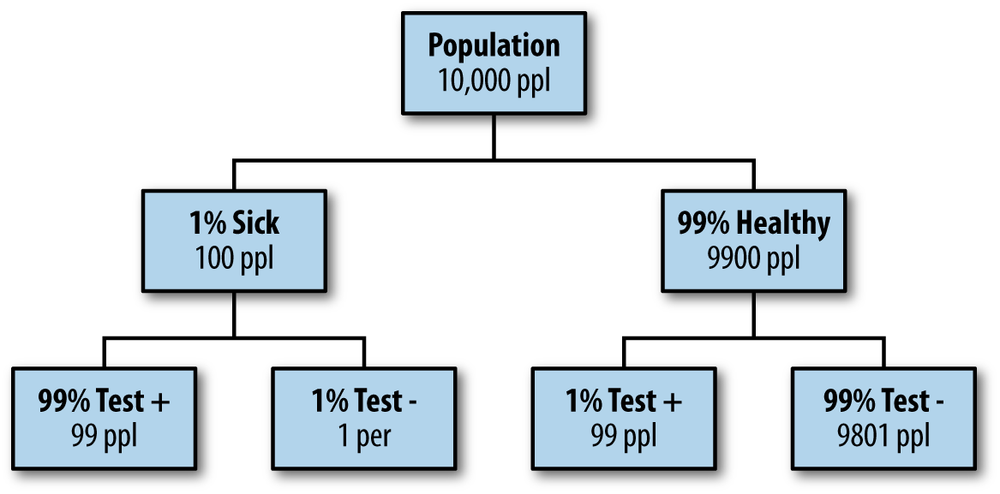

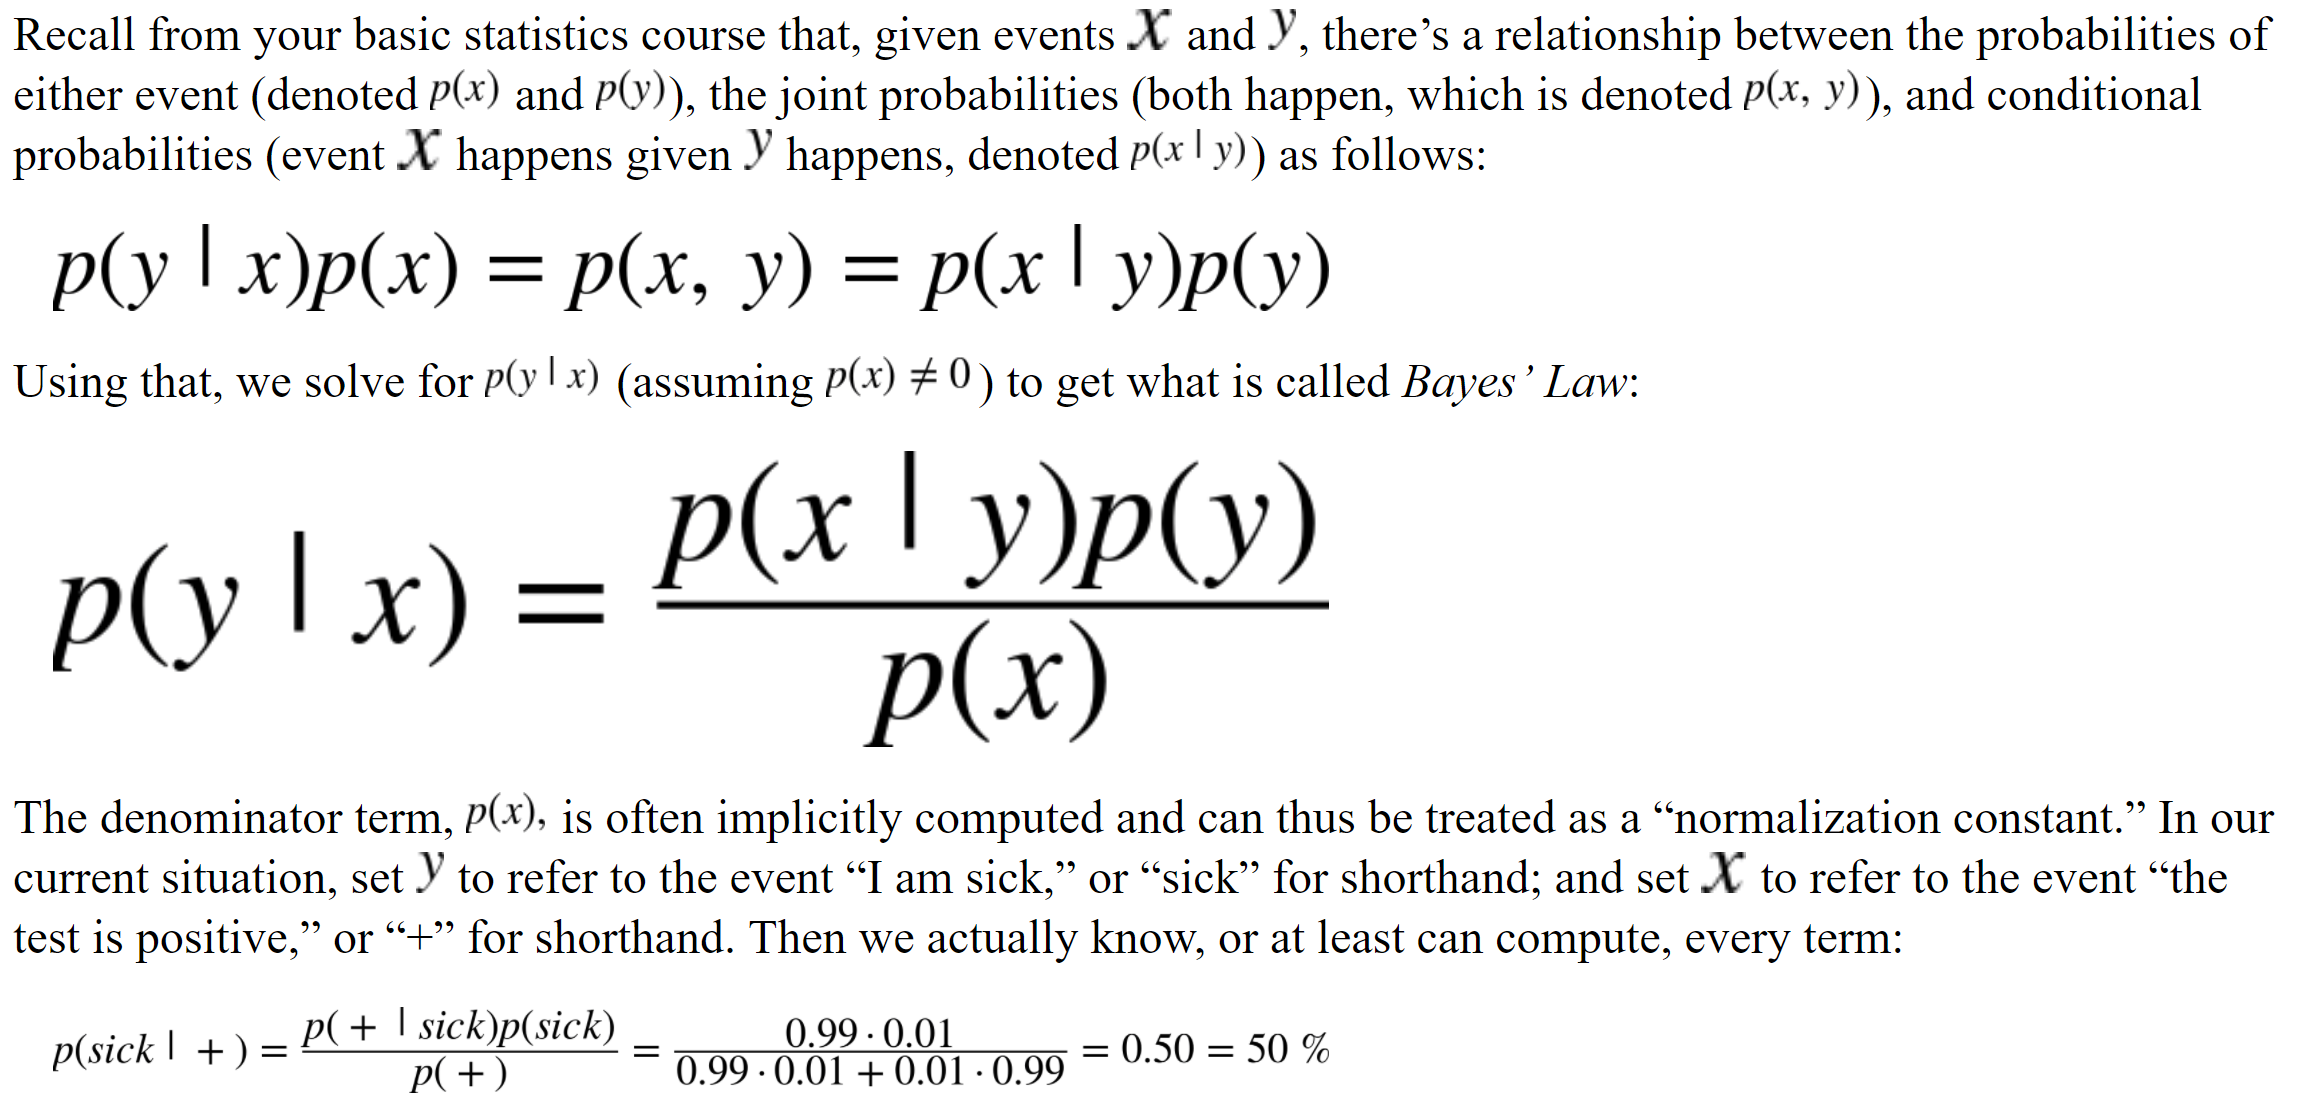

In [2]:
#https://github.com/tidyverse/ggplot2/tree/master/data-raw
import csv

In [3]:
# check first few liines to see the data
with open('resources/diamonds.csv') as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
        print(row)
        if i > 5:
            break

['', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
['1', '0.23', 'Ideal', 'E', 'SI2', '61.5', '55', '326', '3.95', '3.98', '2.43']
['2', '0.21', 'Premium', 'E', 'SI1', '59.8', '61', '326', '3.89', '3.84', '2.31']
['3', '0.23', 'Good', 'E', 'VS1', '56.9', '65', '327', '4.05', '4.07', '2.31']
['4', '0.29', 'Premium', 'I', 'VS2', '62.4', '58', '334', '4.2', '4.23', '2.63']
['5', '0.31', 'Good', 'J', 'SI2', '63.3', '58', '335', '4.34', '4.35', '2.75']
['6', '0.24', 'Very Good', 'J', 'VVS2', '62.8', '57', '336', '3.94', '3.96', '2.48']


Exercise 1. Write code to count rows that have color entry as 'E'. 
#Hint: Use the loop structure above to do the count. Note that you can access color value of each row by indexing 
the row appropriately.

In [10]:
with open('resources/diamonds.csv') as csvfile:
    reader = csv.reader(csvfile)
    count=0
    for i , row in enumerate(reader):
        if row[3]== 'E':
            count=count+1
print(count)
        

9797


Exercise 2: Modify the code to count rows that have color entry as 'E' and cut entry as 'Ideal'

In [18]:
with open('resources/diamonds.csv') as csvfile:
    reader = csv.reader(csvfile)
    count=0
    for i , row in enumerate(reader):
        if (row[3]== 'E' and row[2] == 'Ideal'):
            count=count+1
print(count)

3903


In [4]:
# Extract all values for cuts and colors
cuts = []
colors = []
with open('resources/diamonds.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cuts.append(row['cut'])
        colors.append(row['color'])
cuts

['Ideal',
 'Premium',
 'Good',
 'Premium',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fair',
 'Very Good',
 'Good',
 'Ideal',
 'Premium',
 'Ideal',
 'Premium',
 'Premium',
 'Ideal',
 'Good',
 'Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Premium',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Good',
 'Good',
 'Good',
 'Very Good',
 'Ideal',
 'Ideal',
 'Ideal',
 'Good',
 'Good',
 'Good',
 'Premium',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Ideal',
 'Ideal',
 'Premium',
 'Premium',
 'Ideal',
 'Premium',
 'Very Good',
 'Very Good',
 'Good',
 'Ideal',
 'Premium',
 'Ideal',
 'Ideal',
 'Premium',
 'Ideal',
 'Ideal',
 'Very Good',
 'Premium',
 'Premium',
 'Very Good',
 'Very Good',
 'Premium',
 'Premium',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Ideal',
 'Ideal',
 'Go

In [5]:
# Extract all values for cuts and colors using numpy 
import numpy as np
with open('resources/diamonds.csv') as csvfile:
    reader = csv.reader(csvfile)
    diam = list(reader)
diama = np.asarray(diam, dtype=object)
print (diama.shape)
print (diama[0:2,])

(53941, 11)
[['' 'carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']
 ['1' '0.23' 'Ideal' 'E' 'SI2' '61.5' '55' '326' '3.95' '3.98' '2.43']]


In [28]:
cutsa =  diama[1:,2]
print(cutsa.shape)
colorsa = diama[1:, 3]
print (cutsa[0:10])
print (colorsa[0:10])

(53940,)
['Ideal' 'Premium' 'Good' 'Premium' 'Good' 'Very Good' 'Very Good'
 'Very Good' 'Fair' 'Very Good']
['E' 'E' 'E' 'I' 'J' 'J' 'I' 'H' 'E' 'H']


In [6]:
colortypes = set(colors)
colortypes = sorted(colortypes)
print(colortypes)

cuttypes = set(cuts)
cuttypes = sorted(cuttypes)
print(cuttypes)

print(len(colors))
totalrec = len(colors)

['D', 'E', 'F', 'G', 'H', 'I', 'J']
['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
53940


In [8]:
colorcut = list(zip(colors, cuts)) 
colorcut[0:20]

[('E', 'Ideal'),
 ('E', 'Premium'),
 ('E', 'Good'),
 ('I', 'Premium'),
 ('J', 'Good'),
 ('J', 'Very Good'),
 ('I', 'Very Good'),
 ('H', 'Very Good'),
 ('E', 'Fair'),
 ('H', 'Very Good'),
 ('J', 'Good'),
 ('J', 'Ideal'),
 ('F', 'Premium'),
 ('J', 'Ideal'),
 ('E', 'Premium'),
 ('E', 'Premium'),
 ('I', 'Ideal'),
 ('J', 'Good'),
 ('J', 'Good'),
 ('J', 'Very Good')]

In [7]:
for i,colori in enumerate(colortypes):
    print(i, colori) 

0 D
1 E
2 F
3 G
4 H
5 I
6 J


In [8]:
for i,cuti in enumerate(cuttypes):
    print(i, cuti)
   

0 Fair
1 Good
2 Ideal
3 Premium
4 Very Good


In [9]:
countcc = {}
jtprob = np.ndarray((len(colortypes), len(cuttypes)))

for i, colori in enumerate(colortypes):
    for j, cuti in enumerate(cuttypes):
        count = len(list(filter(lambda x: x[0]==colori and x[1]==cuti, colorcut)))
        countcc[(colori, cuti)] = count
        jtprob[i, j] = count/totalrec

print(jtprob)

[[0.00302188 0.0122729  0.05253986 0.02971821 0.02804968]
 [0.00415276 0.017297   0.07235818 0.04332592 0.04449388]
 [0.0057842  0.01685206 0.07093066 0.04321468 0.04011865]
 [0.00582128 0.01614757 0.09054505 0.05420838 0.04262143]
 [0.00561735 0.01301446 0.05774935 0.04375232 0.03381535]
 [0.00324435 0.00967742 0.03880237 0.02647386 0.0223211 ]
 [0.00220615 0.00569151 0.01661105 0.01497961 0.01256952]]


In [69]:
np.sum(jtprob)

1.0

In [73]:
countcc

{('D', 'Fair'): 163,
 ('D', 'Good'): 662,
 ('D', 'Ideal'): 2834,
 ('D', 'Premium'): 1603,
 ('D', 'Very Good'): 1513,
 ('E', 'Fair'): 224,
 ('E', 'Good'): 933,
 ('E', 'Ideal'): 3903,
 ('E', 'Premium'): 2337,
 ('E', 'Very Good'): 2400,
 ('F', 'Fair'): 312,
 ('F', 'Good'): 909,
 ('F', 'Ideal'): 3826,
 ('F', 'Premium'): 2331,
 ('F', 'Very Good'): 2164,
 ('G', 'Fair'): 314,
 ('G', 'Good'): 871,
 ('G', 'Ideal'): 4884,
 ('G', 'Premium'): 2924,
 ('G', 'Very Good'): 2299,
 ('H', 'Fair'): 303,
 ('H', 'Good'): 702,
 ('H', 'Ideal'): 3115,
 ('H', 'Premium'): 2360,
 ('H', 'Very Good'): 1824,
 ('I', 'Fair'): 175,
 ('I', 'Good'): 522,
 ('I', 'Ideal'): 2093,
 ('I', 'Premium'): 1428,
 ('I', 'Very Good'): 1204,
 ('J', 'Fair'): 119,
 ('J', 'Good'): 307,
 ('J', 'Ideal'): 896,
 ('J', 'Premium'): 808,
 ('J', 'Very Good'): 678}

In [74]:
# X color, Y cut  P(Y = Premium)
print(np.sum(jtprob[:, 3]))

0.25567296996662964


In [75]:
# X color, Y cut  P(X = 'G')
print(np.sum(jtprob[3, :]))

0.20934371523915463


In [76]:
# Conditional probability P(X=G|Y=Ideal)
# for this we need P(X = G  and Y = Ideal)   and P(Y = Ideal)
# P(X|Y) = P(XY)/P(Y)

pxy = jtprob[3,2]
py = np.sum(jtprob[:, 2])
pxy/py

# note that P(X=G) is 0.20934 which is less compared to conditional

0.22662521460721075

Exercise 3: Calculate the conditional probability P(X=H | Y=Very Good)

In [11]:
#colour=H has an index of 4 in Color array.
#cut =Very good has an index of 4 in cut aray.
# P(X|Y) = P(XY)/P(Y)
pxy = jtprob[4,4]
py = np.sum(jtprob[:, 4])
pxy/py

0.150968382718093

Exercise 4: Calculate the probability P(X=F)

In [13]:
# X=F has a value in index 2 for color array.
py=print(np.sum(jtprob[2, :]))
py

0.17690025954764554
